In [61]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [62]:
!pip install tensorflow keras numpy matplotlib pandas sklearn Bio

In [0]:
#import the libraries
# from Bio import SeqIO
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Lambda
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re, ast
import keras
import tensorflow
np.random.seed(1000)

Class 0: 2767
Class 1: 327
Proportion: 8.46 : 1


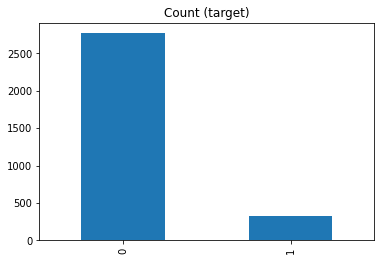

In [92]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Binary_Encoding.csv')
target_count = df.Propionylation.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [93]:
# Class count
count_class_0, count_class_1 = df.Propionylation.value_counts()

# Divide by class
df_class_0 = df[df.Propionylation == 0]
df_class_1 = df[df.Propionylation == 1]
print(len(df_class_0))

2767


Random over-sampling:
1    2767
0    2767
Name: Propionylation, dtype: int64


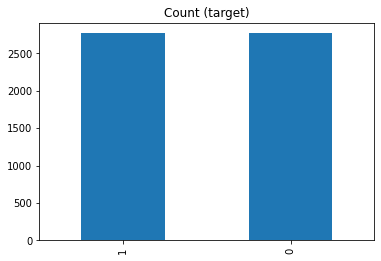

In [94]:

import pandas as pd
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.Propionylation.value_counts())

df_over.Propionylation.value_counts().plot(kind='bar', title='Count (target)');

In [0]:
X=df_over.Image_Array

In [96]:
print (X[0])

0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...
0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...
0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...
0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...
0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...
0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...
0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...
0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...
0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...
Name: Image_Array, dtype: object


In [0]:
Y=df_over.Propionylation

In [98]:
print (Y[0])

0    1
0    1
0    1
0    1
0    1
0    1
0    1
0    1
0    1
Name: Propionylation, dtype: int64


In [99]:
from sklearn.model_selection import train_test_split
X1,X2,Y1,Y2=train_test_split(X,Y,test_size=0.2,random_state=20)

print('The size of our training "X1"(input feature) is',X1.shape)
print('The size of our testing "X2"(input feature) is',X2.shape)
print('The size of our training "Y1"(output feature) is',Y1.shape)
print('The size of our testing "Y2"(output feature) is',Y2.shape)

The size of our training "X1"(input feature) is (4427,)
The size of our testing "X2"(input feature) is (1107,)
The size of our training "Y1"(output feature) is (4427,)
The size of our testing "Y2"(output feature) is (1107,)


In [100]:
NP_list=[]
y_train=np.array(Y1)
print(len(y_train))
for i in X1:
    NP=np.array(ast.literal_eval(i))
    NP_list.append(NP)
print(len(NP_list[0]))
X_train=np.array(NP_list)
print(len(X_train))
print(X_train[0])

4427
25
4427
[[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [101]:
NP_list=[]
y_test=np.array(Y2)
print(len(y_test))
for i in X2:
    NP=np.array(ast.literal_eval(i))
    NP_list.append(NP)
print(len(NP_list[0]))
X_test=np.array(NP_list)
print(len(X_test))
print(X_test[0])

1107
25
1107
[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [0]:
#Reshape the data to fit the model
X_train = X_train.reshape(4427,25,21,1)
X_test = X_test.reshape(1107,25,21,1)

In [103]:
# One-Hot Encode target column (Y-Data sets) : Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_test_one_hot)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [0]:
# ... feature standarization
mean_px = X_train.mean().astype(np.float32)
std_px = 255.0

def standardize(x):
    return (x-mean_px)/std_px

In [0]:

from keras.layers import MaxPooling2D
#Build the CNN model
model = Sequential()
# add model layers
model.add(Conv2D(128, kernel_size=3, activation='relu',padding="same", input_shape=(25,21,1)))
model.add(Conv2D(128, kernel_size=3, activation='relu',padding="same"))
model.add(Conv2D(128, kernel_size=3, activation='relu',padding="same"))
model.add(Dropout(0.4))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3, activation='relu',padding="same"))
model.add(Conv2D(64, kernel_size=3, activation='relu',padding="same"))
model.add(Conv2D(64, kernel_size=3, activation='relu',padding="same"))
model.add(Dropout(0.4))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [0]:
#Compile the model
from keras.optimizers import Adam, SGD
opt = Adam(lr=1.0e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [107]:
#Train the model
#Batch: Total number of training examples present in a single batch (None = default 32)
#Epoch:The number of iterations when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
#Fit: Another word for train
hist = model.fit(X_train, y_train_one_hot, validation_split=0.10, epochs=15)

Train on 3984 samples, validate on 443 samples
Epoch 1/15
3984/3984 [==============================] - 4s 1ms/step - loss: 0.6930 - accuracy: 0.5090 - val_loss: 0.6922 - val_accuracy: 0.5079
Epoch 2/15
3984/3984 [==============================] - 4s 957us/step - loss: 0.6872 - accuracy: 0.5359 - val_loss: 0.6845 - val_accuracy: 0.5530
Epoch 3/15
3984/3984 [==============================] - 4s 956us/step - loss: 0.6664 - accuracy: 0.5909 - val_loss: 0.6645 - val_accuracy: 0.6117
Epoch 4/15
3984/3984 [==============================] - 4s 967us/step - loss: 0.6495 - accuracy: 0.6308 - val_loss: 0.6562 - val_accuracy: 0.6208
Epoch 5/15
3984/3984 [==============================] - 4s 954us/step - loss: 0.6339 - accuracy: 0.6368 - val_loss: 0.6648 - val_accuracy: 0.6140
Epoch 6/15
3984/3984 [==============================] - 4s 956us/step - loss: 0.6299 - accuracy: 0.6386 - val_loss: 0.6321 - val_accuracy: 0.6388
Epoch 7/15
3984/3984 [==============================] - 4s 959us/step - loss: 0

In [108]:
#Show predictions as probabilites for the first 4 images in the test set
predictions = model.predict(X_test)
predictions 

array([[0.13649544, 0.8635045 ],
       [0.2914762 , 0.7085238 ],
       [0.30890337, 0.69109666],
       ...,
       [0.4419206 , 0.5580794 ],
       [0.70779234, 0.2922077 ],
       [0.19181643, 0.8081836 ]], dtype=float32)

In [109]:
#Print our predicitons as number labels for the first 4 images
y_pred=( np.argmax(predictions,axis=1))
#Print the actual labels
print(y_pred)

[1 1 1 ... 1 0 1]


In [110]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 25, 21, 128)       1280      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 25, 21, 128)       147584    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 25, 21, 128)       147584    
_________________________________________________________________
dropout_13 (Dropout)         (None, 25, 21, 128)       0         
_________________________________________________________________
average_pooling2d_7 (Average (None, 12, 10, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 10, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 10, 64)       

In [111]:
# evaluate the keras model
accuracy = model.evaluate(X_train, y_train_one_hot)
print(f'Test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

4427/4427 [==============================] - 1s 279us/step
Test results - Loss: 0.31608577469468574 - Accuracy: 88.95414471626282%


In [112]:
# evaluate the keras model
accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

1107/1107 [==============================] - 0s 280us/step
Test results - Loss: 0.4099223194568138 - Accuracy: 81.3911497592926%


In [113]:
from sklearn.metrics import classification_report,confusion_matrix

cm=np.array(confusion_matrix(y_test,y_pred,labels=[0,1]))
confusion=pd.DataFrame(cm,index=['not_Propionylation','Propionylation'],
                        columns=['predicted_not_Propionylation','predicted_Propionylation'])
print(confusion)

                   predicted_not_Glutarylation  predicted_Glutarylation
not_Glutarylation                          396                      158
Glutarylation                               48                      505


In [114]:
True_Positive=confusion.at['Propionylation','predicted_Propionylation']
False_Positive=confusion.at['not_Propionylation','predicted_Propionylation']
True_Negative=confusion.at['not_Propionylation','predicted_not_Propionylation']
False_Negative=confusion.at['Propionylation','predicted_not_Propionylation']
print("TP",True_Positive)
print("FP",False_Positive)
print("TN",True_Negative)
print("FN",False_Negative)

TP 505
FP 158
TN 396
FN 48


In [115]:
#Accuracy==>>accuracy = (correctly predicted class / total testing class) × 100%
# accuracy_score(y_predict, y_test)

total_testing_class=True_Positive+True_Negative+False_Positive+False_Negative
correctly_predicted_class=True_Positive + True_Negative
accuracy = (correctly_predicted_class / total_testing_class) * 100
print("Accuracy :",accuracy)

Accuracy : 81.39114724480578


In [116]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(y_test,y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test,y_pred))
print ('Report : ')
print (classification_report(y_test,y_pred))

Confusion Matrix :
[[396 158]
 [ 48 505]]
Accuracy Score : 0.8139114724480578
Report : 
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       554
           1       0.76      0.91      0.83       553

    accuracy                           0.81      1107
   macro avg       0.83      0.81      0.81      1107
weighted avg       0.83      0.81      0.81      1107



In [117]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc_lst=[]
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = (roc_auc_score(y_test, lr_probs))*100
print(lr_auc)
auc_lst.append(lr_auc)

91.10170321384507


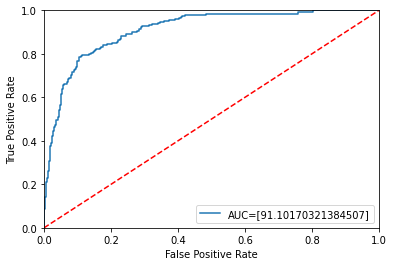

In [118]:
from matplotlib import pyplot
# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.plot(fpr,tpr,label="AUC="+str(auc_lst))
# show the legend
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1])
pyplot.legend()
# show the plot
pyplot.show()